# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
>An overview of the dataset I chose for the analysis is given in this portion of the report.
For my data analysis study, I used the No-show appointments dataset as a sample.
This dataset focuses on the issue of whether or not people show up for their appointment and gathers data from 100k medical appointments in Brazil. Each row contains information about a different patient trait. 

>There are 14 columns in the dataset:

>PatientId: Patient identification

>AppointmentID: Each appointment's identification

>Gender: Male or Female.

>ScheduledDay: that the patient's visit was scheduled for.

>AppointmentDay: the day of the appointment.

>Age: Patients age

>Neighbourhood: identifies the hospital's location.

>Scholarship whether or not the patient is enrolled in Brasilian welfare program

>Hipertension True or False

>Diabetes True or False

>Alcoholism True or False

>Handcap True or False

>SMS_received True of False

>No-show Patients who attended or missed their appointment (Yes = Missed; No = Attended)



### Question(s) for Analysis
>1.Will a patient's gender influences how well he/she will show up for an appointment?

>2.Will a patients' ages affect if they show up for an appointment?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
## check the dimention of the dataframe
df.shape

(110527, 14)

In [5]:
## Descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
## information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
## data type of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
## check for null/missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
## check for duplicate values
df.duplicated().sum()

0

#### Histogram of the parameters
>The Histogram is set to showcase the range and peaks in each parameter

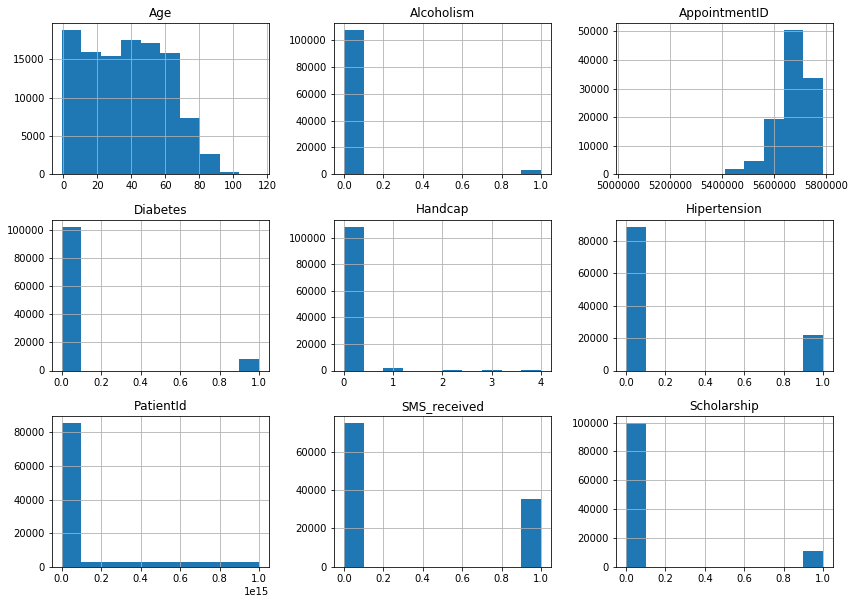

In [10]:
df.hist( figsize=(14,10));

### Dataset Overview
>Here are some conclusions drawn from the analysis of the aforementioned dataset:
Here are some conclusions drawn from the analysis of the aforementioned dataset:

>1. The patients' average age is 37, the youngest is -1, which is incorrect, and the oldest is -1 year.
>2. The average number of patients receiving financial aid is 9.8 
>3. The average number of patients with hypertension is 19.7 
>4. The average number of patients with diabetes is 7.1 
>5. The patients' average alcoholism was 3.0.
>6.Patients with disabilities rated an average of 2.2 compared to 32.1 for patients who received SMS.


### Data Cleaning
>1.Rename 'No-show' column

>2.Remove error ages(-1) in 'Age' column

>3.Remove unwanted columns
 

In [11]:
# select rows wrong age (-1) input
df.loc[df['Age'] == -1].index

Int64Index([99832], dtype='int64')

In [12]:
## delete rows with Age value of -1
df=df.drop(df.loc[df['Age'] == -1].index)
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [13]:
## drop unwanted columns
df = df.drop(['ScheduledDay','AppointmentDay'], axis=1)
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.rename(columns={"No-show":"Missed-Appointment"} ,inplace=True)
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Missed-Appointment
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
## change column to lowercases
df.columns= df.columns.str.strip().str.lower()
df.head()

,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,missed-appointment
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [31]:
##create age groups
bins= [0,15,25,65,90]
labels = ['Children','Youth','Adults','Seniors']
df['agegrp'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
agegrp_count = df.groupby('agegrp')['missed-appointment'].value_counts()
df.head(10)



,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,missed-appointment,agegrp
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adults
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adults
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adults
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adults
5,9.598513e+13,5626772,F,76,REPÚBLICA,0,1,0,0,0,0,No,Seniors
6,7.336882e+14,5630279,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Youth
7,3.449833e+12,5630575,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Adults
8,5.639473e+13,5638447,F,21,ANDORINHAS,0,0,0,0,0,0,No,Youth
9,7.812456e+13,5629123,F,19,CONQUISTA,0,0,0,0,0,0,No,Youth


In [52]:
#correlation between parameters
df.corr(method ='pearson')

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
patientid,1.000000,0.004023,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742
appointmentid,0.004023,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613
age,-0.004121,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633
scholarship,-0.002877,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192
hipertension,-0.006436,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270
diabetes,0.001608,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552
alcoholism,0.011014,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149
handcap,-0.007915,0.014107,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162
sms_received,-0.009742,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> 


> 


### Question 1 Will a patient's gender influences how well he/she will show up for an appointment?

In [17]:
# gender overview

df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

#### Gender Percentage 
>To showcase the percentages between Males and Females a Doughnut charts was use to represent the relationship

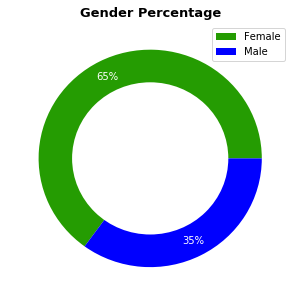

In [18]:
## doughnut chat to show gender percentage
Noshow=plt.figure(figsize=(5,5))
plt.pie(df['gender'].value_counts().values,labels=['Female','Male'],autopct='%.0f%%', textprops={'color':"w"},colors=['#259c02', 'b'],pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
plt.title('Gender Percentage',fontsize = 13, weight='bold')
fig.gca().add_artist(centre_circle)
plt.legend()
plt.show()


In [19]:
# missed-appointment overview
df['missed-appointment'].value_counts()

No     88207
Yes    22319
Name: missed-appointment, dtype: int64

#### Missed Appointment Status 
>The relationship between patients who missed their appointments ('Yes') and patients who showed up ('No') is expressed in the Doughnut chart below



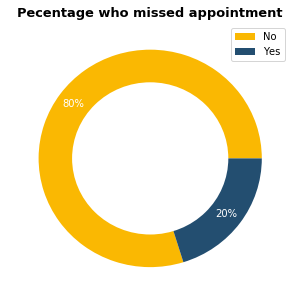

In [20]:
## doughnut chat to show percentage missed appointment
missedAppointments=plt.figure(figsize=(5,5))
plt.pie(df['missed-appointment'].value_counts().values,labels=['No','Yes'],autopct='%.0f%%', textprops={'color':"w"},colors=['#fab802', '#234E70'],pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
plt.title('Pecentage who missed appointment',fontsize = 13, weight='bold')
fig.gca().add_artist(centre_circle)
plt.legend()
plt.show()



In [35]:
#frequency of missed appointments across genders
df.groupby('gender')['missed-appointment'].value_counts()

gender  missed-appointment
F       No                    57245
        Yes                   14594
M       No                    30962
        Yes                    7725
Name: missed-appointment, dtype: int64

#### Frequency of missed appointments across genders
>comparism of the patients who missed appointments across genders using count is show below in the Bar chart

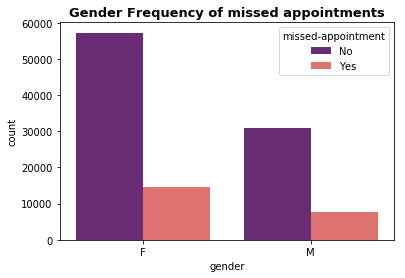

In [21]:
#Bar charts of frequency of missed appointments across genders
sns.countplot(x = 'gender', hue = 'missed-appointment', data = df, palette = 'magma')
plt.title('Gender Frequency of missed appointments',fontsize = 13, weight='bold')
plt.show()

In [45]:
#gender percentage of missed appointments across genders
def stackedBar(df, aVaR, figsize = (14, 6), stacked = True, normalize = False):
    df.groupby(aVaR)['missed-appointment'].value_counts(normalize = normalize).mul(int(f'{100 if normalize else 1}')).round(2).unstack().plot(kind="bar",
                                                                                                                                 stacked=stacked, 
                                                                                                                                 figsize=figsize,
                                                                                                                                width=0.7,
                                                                                                                                edgecolor='white',
                                                                                                                                 rot= 0);
    plt.ylabel("missed-appointment")
    plt.title(f"Gender percentage of patients who missed appointments".title(),fontsize = 13, weight='bold');
    if normalize :
        plt.axhline(df['missed-appointment'].value_counts(normalize = True).mul(100)[0],
                   color = '#fab802', ls = '-.', alpha = 0.75, label = 'proportion of Attendance\n (All patients)')
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
    


#### Percentage of missed appointmenta across genders
> the percentage of missed appointments across genders is showcased in the stacked bar chart below

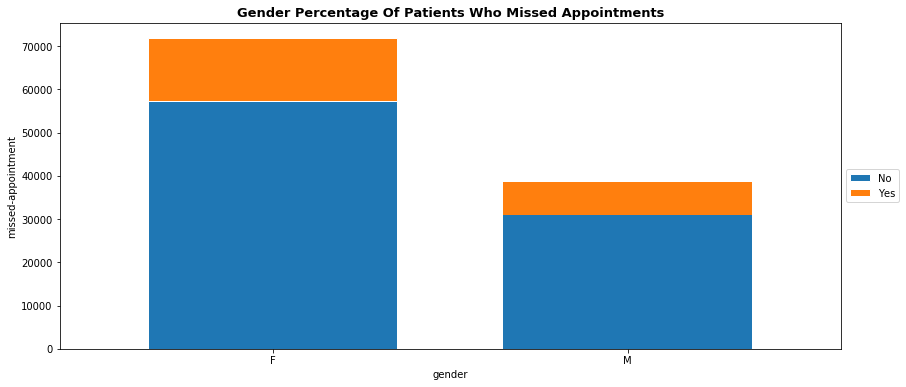

In [46]:
 stackedBar(df, 'gender')

### Question 2  Will a patients' ages affect if they show up for an appointment?


### Histogram of Age
> the age range peaks and lows is display using a Histogram chart

Text(0.5,1,'Histogram of age range')

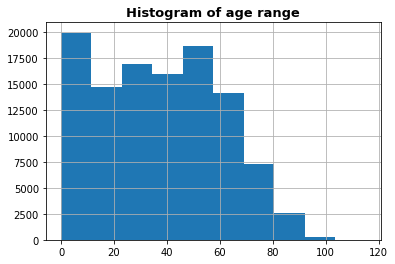

In [36]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['age'].hist();
plt.title('Histogram of age range',fontsize = 13, weight='bold')

#### Count of Age Group
> the number of patients each age groups are represented in the horizontal bar chart below. each age group is color coded

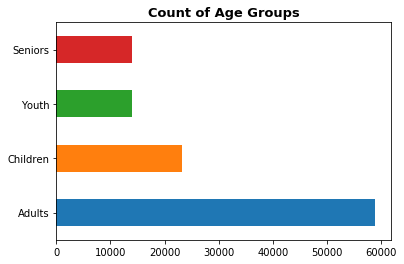

In [25]:
## horizontal bar chat of age groups
df['agegrp'].value_counts().plot(kind='barh');
plt.title('Count of Age Groups',fontsize = 13, weight='bold');

#### Age Group percentages
>percentage of total of each age agroups is showcased below

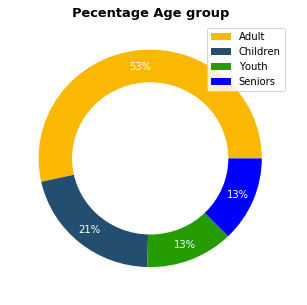

In [26]:
## doughnut chat to show percentage age group
Noshow=plt.figure(figsize=(5,5))
plt.pie(df['agegrp'].value_counts().values,labels=['Adult','Children','Youth','Seniors'],autopct='%.0f%%', textprops={'color':"w"},colors=['#fab802', '#234E70','#259c02', 'b'],pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
plt.title('Pecentage Age group',fontsize = 13, weight='bold')
fig.gca().add_artist(centre_circle)
plt.legend()
plt.show()



In [51]:
#frequency of missed appointments across age groups
df.groupby('agegrp')['missed-appointment'].value_counts()

agegrp    missed-appointment
Children  No                    18331
          Yes                    4926
Youth     No                    10470
          Yes                    3540
Adults    No                    47237
          Yes                   11620
Seniors   No                    11837
          Yes                    2148
Name: missed-appointment, dtype: int64

#### Number of missed appointments across age group
>showcase of number of patients who missed appointments is displayed below

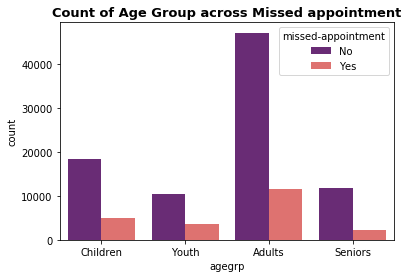

In [27]:
#counts show and noshow across age groups
sns.countplot(x = 'agegrp', hue = 'missed-appointment', data = df, palette = 'magma')
plt.title('Count of Age Group across Missed appointment',fontsize = 13, weight='bold')
plt.show()

#### Percentage of missed appointments across all age groups
> the percentage of missed appointments across the various age groups is showcased in the stacked bar chart below

Text(0.5,1,'Percentage of missed and showed up patients across age group')

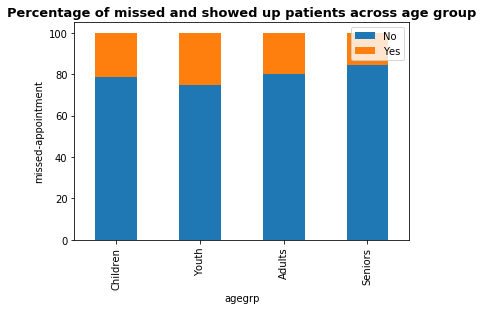

In [28]:
#age group of show and no show patients
(agegrp_count/agegrp_count.groupby(level=0).sum()*100).unstack().plot(kind="bar",stacked=True)
plt.legend(['No','Yes'])
plt.ylabel('missed-appointment')
plt.title('Percentage of missed and showed up patients across age group',fontsize = 13, weight='bold')



<a id='conclusions'></a>
## Conclusions

> Male patients made up 35% of the sampled patients, while female patients made up 65%. 

>Since 80% (88207) of the patients in the sampled dataset showed up for their appointments, and 20% (22319) of the patients missed their appointments, the majority of the patients are unlikely to miss an appointment. 

>With around a quarter (25%) of both males and females missing their appointments, there isn't much of a difference in the rate of missed appointments between the sexes. 


>Adults (25-64) make up the largest portion of the population overall, with an average age of 37. 

>The age group of youth (15 to 24) skipped appointments the most—about 25%—while elderly missed appointments the least frequently.
## Limitations

> The is no reasonable correlation between the parameters
> a larger proportion of females than males.
> age with value < 0


In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0